In [49]:
# Install imbalanced-learn package using pip (if not already installed)
#xy - perform knn model on both clean/non augmented and merged df- compare them at the end
!pip install imblearn
!pip install --upgrade scikit-learn imbalanced-learn
!pip install pandas


# Import necessary libraries
import pandas as pd
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import seaborn as sns


KNN MODEL ON CLEAN DF FIRST

In [50]:
#load clean non aug dataset
final_df = pd.read_csv('final_df.csv')
# drop first column
final_df.drop('Unnamed: 0', axis='columns', inplace=True)
final_df.head()

,Emotions_with_gender,Path,MFCC0,MFCC1,MFCC2,MFCC3,MFCC4,MFCC5,MFCC6,MFCC7,...,MEL125,MEL126,MEL127,TONZ0,TONZ1,TONZ2,TONZ3,TONZ4,TONZ5,Emotions_without_gender
0,13,Ravdess\03-01-01-01-01-01-01.wav,-697.79260,54.890040,0.663466,12.435786,7.733952,0.530750,-3.216631,-3.159394,...,0.000005,0.000004,3.206722e-07,-0.049044,0.020024,-0.018065,-0.064224,0.014611,0.006371,5
1,5,Ravdess\03-01-01-01-01-01-02.wav,-650.71090,54.477303,-9.090127,8.411754,-4.387536,-3.765706,-5.362752,-8.610381,...,0.000006,0.000004,3.992178e-07,-0.019344,0.012139,0.013491,-0.040532,0.006054,0.002813,5
2,13,Ravdess\03-01-01-01-01-01-03.wav,-614.73914,56.708190,-2.685535,10.650176,4.240806,-2.472097,-12.035720,-6.654510,...,0.000071,0.000045,4.472179e-06,-0.013746,-0.006525,0.013147,-0.001333,0.005258,-0.001753,5
3,5,Ravdess\03-01-01-01-01-01-04.wav,-695.85030,42.934265,-7.274557,8.977729,-4.170579,-4.924890,-6.537960,-12.679187,...,0.000013,0.000006,6.443871e-07,-0.006601,0.012613,-0.023542,0.016175,-0.010311,0.000834,5
4,13,Ravdess\03-01-01-01-01-01-05.wav,-713.43350,68.360940,7.989171,15.139791,11.715775,0.430983,1.002558,-2.773119,...,0.000002,0.000001,7.229193e-08,-0.023409,0.016632,-0.042659,0.019653,0.014472,0.010889,5


In [51]:
final_df_testing = final_df.copy()
X_clean = final_df_testing.drop(columns=['Path', 'Emotions_without_gender','Emotions_with_gender'], axis=1)
y_clean = final_df_testing['Emotions_with_gender']

# Split 
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Feature scaling 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle imbalance classes with SMOTE for training dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

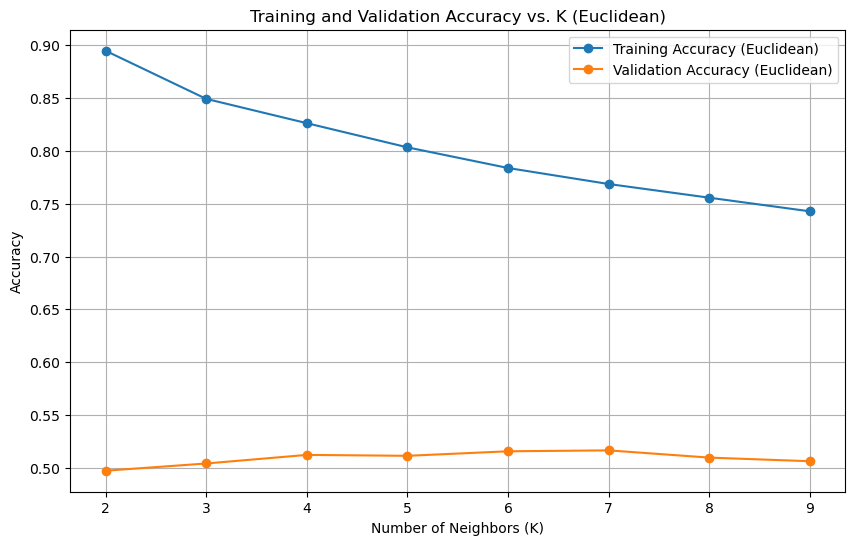

Optimal k for Euclidean distance: 7


In [52]:
k_values = range(2, 10)

train_scores_euclidean = []
val_scores_euclidean = []

# Loop through each value of k
for k in k_values:
    knn_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    
    # Fit KNN classifier to training data
    knn_euclidean.fit(X_train_resampled, y_train_resampled)
    
    # Calculate training accuracy
    train_score = knn_euclidean.score(X_train_resampled, y_train_resampled)
    train_scores_euclidean.append(train_score)
    
    # Calculate validation accuracy
    val_score = knn_euclidean.score(X_test_scaled, y_test)  
    val_scores_euclidean.append(val_score)

# Plot training and validation accuracy scores for Euclidean distance
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores_euclidean, label='Training Accuracy (Euclidean)', marker='o')
plt.plot(k_values, val_scores_euclidean, label='Validation Accuracy (Euclidean)', marker='o')
plt.title('Training and Validation Accuracy vs. K (Euclidean)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k value based on the peak validation accuracy for Euclidean distance
best_k_euclidean = k_values[np.argmax(val_scores_euclidean)]
print(f'Optimal k for Euclidean distance: {best_k_euclidean}')

In [53]:
# Train KNN model 
classifier_clean = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')
classifier_clean.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_clean = classifier_clean.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy_clean = accuracy_score(y_test, y_pred_clean)
print(f'Accuracy on test set: {accuracy_clean:.4f}')

Accuracy on test set: 0.5165


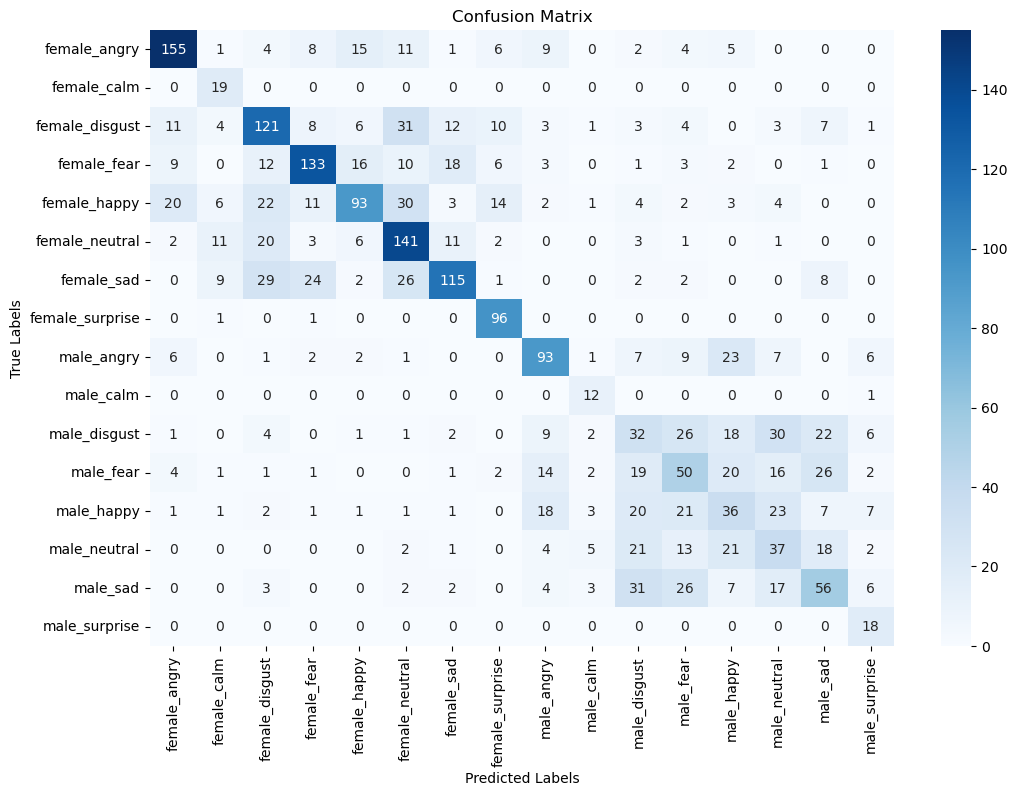

In [54]:
# Calculate confusion matrix
confusion_matrix_clean = confusion_matrix(y_test, y_pred_clean)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

confusion_df = pd.DataFrame(confusion_matrix_clean, index=class_labels, columns=class_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [55]:
# Calculate F1 score
f1_clean_features = f1_score(y_test, y_pred_clean, average='weighted')
print(f'F1 Score: {f1_clean_features:.4f}')
# Calculate F1 score for each class separately
f1_clean_features = f1_score(y_test, y_pred_clean, average=None)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Print F1 score for each class with corresponding class labels
print('F1 Score for Each Class:')
for label, f1 in zip(class_labels, f1_clean_features):
    print(f'{label}: {f1:.4f}')

F1 Score: 0.5140
F1 Score for Each Class:
female_angry: 0.7209
female_calm: 0.5278
female_disgust: 0.5450
female_fear: 0.6552
female_happy: 0.5210
female_neutral: 0.6171
female_sad: 0.5974
female_surprise: 0.8170
male_angry: 0.5868
male_calm: 0.5581
male_disgust: 0.2140
male_fear: 0.3125
male_happy: 0.2590
male_neutral: 0.2824
male_sad: 0.3709
male_surprise: 0.5373


Compare with Manhattan metric

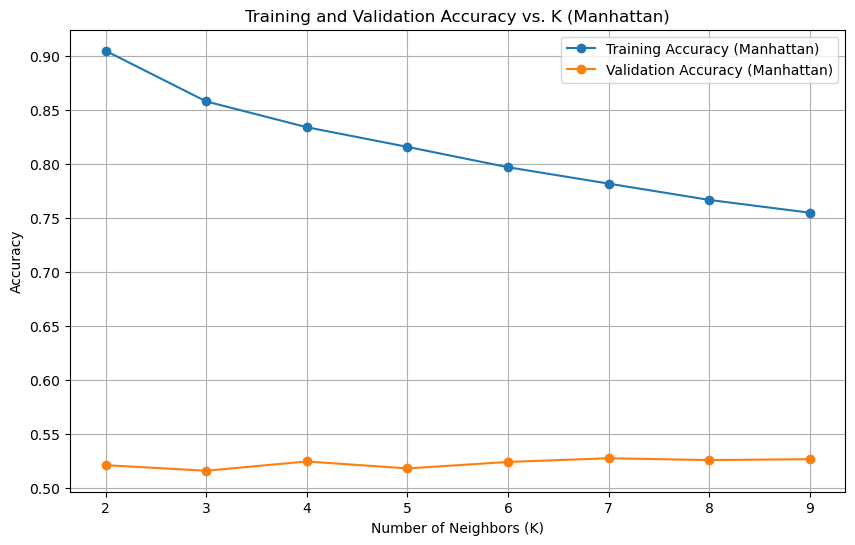

Optimal k for Manhattan distance: 7
Accuracy on test set: 0.5276


In [56]:
k_values = range(2, 10)

# Lists to store training and validation scores for each k
train_scores_manhattan = []
val_scores_manhattan = []

# Loop through each value of k
for k in k_values:
    # Create KNN classifier with current value of k and Manhattan distance metric
    knn_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    
    # Fit KNN classifier to training data
    knn_manhattan.fit(X_train_resampled, y_train_resampled)
    
    # Calculate training accuracy
    train_score = knn_manhattan.score(X_train_resampled, y_train_resampled)
    train_scores_manhattan.append(train_score)
    
    # Calculate validation accuracy
    val_score = knn_manhattan.score(X_test_scaled, y_test)  # Evaluate on the test set
    val_scores_manhattan.append(val_score)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores_manhattan, label='Training Accuracy (Manhattan)', marker='o')
plt.plot(k_values, val_scores_manhattan, label='Validation Accuracy (Manhattan)', marker='o')
plt.title('Training and Validation Accuracy vs. K (Manhattan)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# Find the optimal k value based on the peak validation accuracy 
best_k_manhattan = k_values[np.argmax(val_scores_manhattan)]
print(f'Optimal k for Manhattan distance: {best_k_manhattan}')


# Train KNN model 
classifier_manhattan= KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
classifier_manhattan.fit(X_train_resampled, y_train_resampled)
y_pred_manhattan = classifier_manhattan.predict(X_test_scaled)

# Evaluate 
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)
print(f'Accuracy on test set: {accuracy_manhattan:.4f}')

In [57]:
report_clean = classification_report(y_test, y_pred_clean)
print(report_clean)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       221
           1       0.36      1.00      0.53        19
           2       0.55      0.54      0.55       225
           3       0.69      0.62      0.66       214
           4       0.65      0.43      0.52       215
           5       0.55      0.70      0.62       201
           6       0.69      0.53      0.60       218
           7       0.70      0.98      0.82        98
           8       0.58      0.59      0.59       158
           9       0.40      0.92      0.56        13
          10       0.22      0.21      0.21       154
          11       0.31      0.31      0.31       159
          12       0.27      0.25      0.26       143
          13       0.27      0.30      0.28       124
          14       0.39      0.36      0.37       157
          15       0.37      1.00      0.54        18

    accuracy                           0.52      2337
   macro avg       0.48   

In [58]:
precision_clean_features = precision_score(y_test, y_pred_clean, average=None)
print(f"\nPrecision:\n{precision_clean_features}")


Precision:
[0.74162679 0.35849057 0.55251142 0.69270833 0.65492958 0.55078125
 0.68862275 0.70072993 0.58490566 0.4        0.22068966 0.31055901
 0.26666667 0.26811594 0.3862069  0.36734694]


Repeat above for Merged df

In [59]:
# Load merged dataset
merged_df = pd.read_csv('merged_df.csv')
final_df_testing = merged_df.copy()
X_merged = final_df_testing.drop(columns=['Path', 'Emotions'], axis=1)
y_merged = final_df_testing['Emotions']

# Split 
X_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(X_merged, y_merged, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled_merged = scaler.fit_transform(X_train_merged)
X_test_scaled_merged = scaler.transform(X_test_merged)

# Handle imbalanced classes with SMOTE for the training dataset
smote = SMOTE(random_state=42)
X_train_resampled_merged, y_train_resampled_merged = smote.fit_resample(X_train_scaled_merged, y_train_merged)

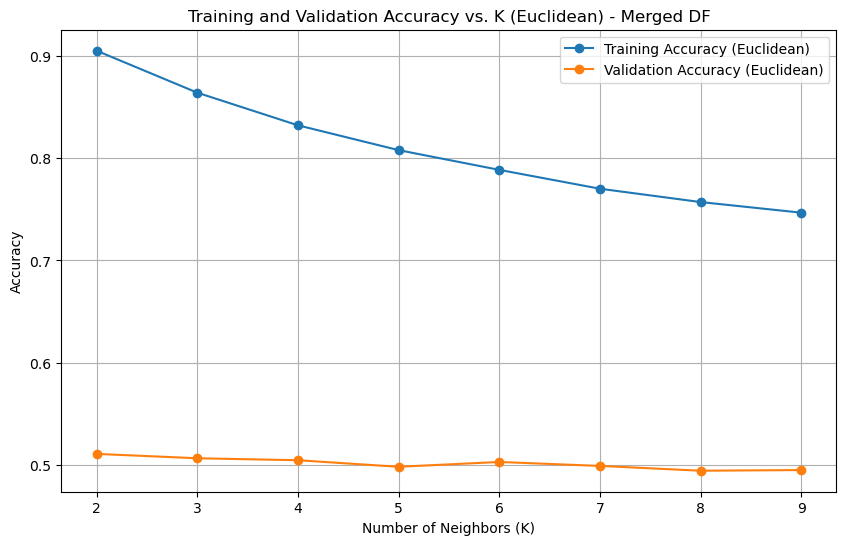

Optimal k for Euclidean distance (Merged DF): 2


In [60]:
# Define range of k values
k_values = range(2, 10)

# Lists to store training and validation scores for each k
train_scores_euclidean_merged = []
val_scores_euclidean_merged = []

# Loop through each value of k
for k in k_values:
    knn_euclidean_merged = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn_euclidean_merged.fit(X_train_resampled_merged, y_train_resampled_merged)
    train_score = knn_euclidean_merged.score(X_train_resampled_merged, y_train_resampled_merged)
    train_scores_euclidean_merged.append(train_score)
    
    # Calculate validation accuracy
    val_score = knn_euclidean_merged.score(X_test_scaled_merged, y_test_merged)  
    val_scores_euclidean_merged.append(val_score)

# Plot training and validation accuracy scores 
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores_euclidean_merged, label='Training Accuracy (Euclidean)', marker='o')
plt.plot(k_values, val_scores_euclidean_merged, label='Validation Accuracy (Euclidean)', marker='o')
plt.title('Training and Validation Accuracy vs. K (Euclidean) - Merged DF')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

# find optimal k value
best_k_euclidean_merged = k_values[np.argmax(val_scores_euclidean_merged)]
print(f'Optimal k for Euclidean distance (Merged DF): {best_k_euclidean_merged}')


In [61]:
# Train KNN model for merged df
classifier_clean_merged = KNeighborsClassifier(n_neighbors=best_k_euclidean_merged, metric='euclidean')
classifier_clean_merged.fit(X_train_resampled_merged, y_train_resampled_merged)
y_pred_clean_merged = classifier_clean_merged.predict(X_test_scaled_merged)

# Evaluate the model on the test set
accuracy_clean_merged = accuracy_score(y_test_merged, y_pred_clean_merged)
print(f'Accuracy on test set (Merged DF): {accuracy_clean_merged:.4f}')

Accuracy on test set (Merged DF): 0.5106


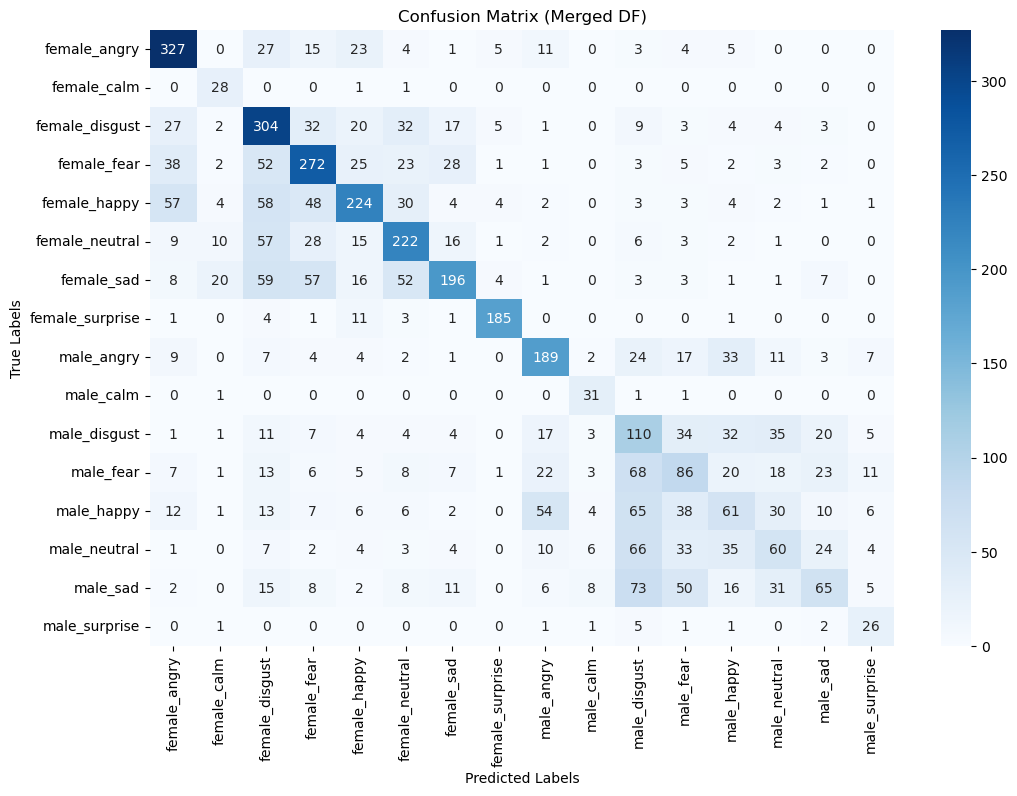

In [62]:
# Calculate confusion matrix for merged dataframe
confusion_matrix_merged = confusion_matrix(y_test_merged, y_pred_clean_merged)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

confusion_df_merged = pd.DataFrame(confusion_matrix_merged, index=class_labels, columns=class_labels)

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_df_merged, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Merged DF)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [63]:
#calc f1 score
f1_clean_features_merged = f1_score(y_test_merged, y_pred_clean_merged, average='weighted')
print(f'Weighted F1 Score (Merged DF): {f1_clean_features_merged:.4f}')
#calc f1 score for each class
f1_clean_features_merged = f1_score(y_test_merged, y_pred_clean_merged, average=None)

class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Print F1 score 
print('F1 Score for Each Class (Merged DF):')
for label, f1 in zip(class_labels, f1_clean_features_merged):
    print(f'{label}: {f1:.4f}')

Weighted F1 Score (Merged DF): 0.5030
F1 Score for Each Class (Merged DF):
female_angry: 0.7078
female_calm: 0.5545
female_disgust: 0.5578
female_fear: 0.5763
female_happy: 0.5565
female_neutral: 0.5766
female_sad: 0.5444
female_surprise: 0.8959
male_angry: 0.6000
male_calm: 0.6739
male_disgust: 0.3026
male_fear: 0.2966
male_happy: 0.2293
male_neutral: 0.2637
male_sad: 0.2826
male_surprise: 0.5049


Compare with manhattan metric (merged df)

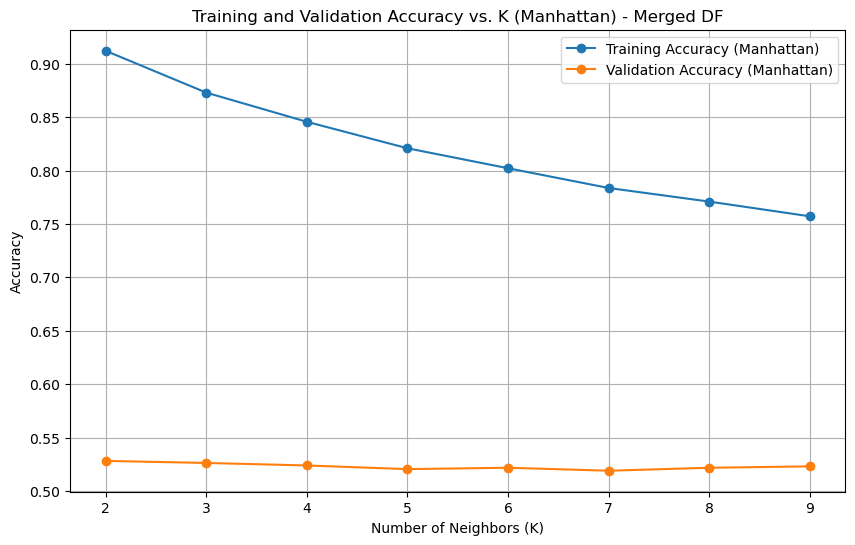

Optimal k for Manhattan distance: 2
Accuracy on test set (Merged DF): 0.5281


In [65]:
k_values = range(2, 10)

train_scores_manhattan_merged = []
val_scores_manhattan_merged = []

for k in k_values:
    # Create KNN classifier with current value of k and Manhattan distance metric
    knn_manhattan_merged = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    
    # Fit KNN classifier to training data
    knn_manhattan_merged.fit(X_train_resampled_merged, y_train_resampled_merged)
    
    # Calculate training accuracy
    train_score = knn_manhattan_merged.score(X_train_resampled_merged, y_train_resampled_merged)
    train_scores_manhattan_merged.append(train_score)
    
    # Calculate validation accuracy
    val_score = knn_manhattan_merged.score(X_test_scaled_merged, y_test_merged)  
    val_scores_manhattan_merged.append(val_score)

# Plot 
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores_manhattan_merged, label='Training Accuracy (Manhattan)', marker='o')
plt.plot(k_values, val_scores_manhattan_merged, label='Validation Accuracy (Manhattan)', marker='o')
plt.title('Training and Validation Accuracy vs. K (Manhattan) - Merged DF')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

#Find the optimal k value based on the peak validation accuracy for Manhattan distance
best_k_manhattan_merged = k_values[np.argmax(val_scores_manhattan_merged)]
print(f'Optimal k for Manhattan distance: {best_k_manhattan_merged}')

#Train KNN model 
classifier_manhattan_merged = KNeighborsClassifier(n_neighbors=best_k_manhattan_merged, metric='manhattan')
classifier_manhattan_merged.fit(X_train_resampled_merged, y_train_resampled_merged)

#Make predictions on the test set
y_pred_manhattan_merged = classifier_manhattan_merged.predict(X_test_scaled_merged)

#Evaluate 
accuracy_manhattan_merged = accuracy_score(y_test_merged, y_pred_manhattan_merged)
print(f'Accuracy on test set (Merged DF): {accuracy_manhattan_merged:.4f}')


In [66]:
report_clean_merged = classification_report(y_test_merged, y_pred_clean_merged)
print(report_clean_merged)

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       425
           1       0.39      0.93      0.55        30
           2       0.48      0.66      0.56       463
           3       0.56      0.60      0.58       457
           4       0.62      0.50      0.56       445
           5       0.56      0.60      0.58       372
           6       0.67      0.46      0.54       428
           7       0.90      0.89      0.90       207
           8       0.60      0.60      0.60       313
           9       0.53      0.91      0.67        34
          10       0.25      0.38      0.30       288
          11       0.31      0.29      0.30       299
          12       0.28      0.19      0.23       315
          13       0.31      0.23      0.26       259
          14       0.41      0.22      0.28       300
          15       0.40      0.68      0.50        38

    accuracy                           0.51      4673
   macro avg       0.50   

In [67]:
# Calculate precision for each class separately
precision_clean_features_merged = precision_score(y_test_merged, y_pred_clean_merged, average=None)

print('Precision for Each Class (Merged DF):')
for label, precision in zip(class_labels, precision_clean_features_merged):
    print(f'{label}: {precision:.4f}')

Precision for Each Class (Merged DF):
female_angry: 0.6553
female_calm: 0.3944
female_disgust: 0.4848
female_fear: 0.5585
female_happy: 0.6222
female_neutral: 0.5578
female_sad: 0.6712
female_surprise: 0.8981
male_angry: 0.5962
male_calm: 0.5345
male_disgust: 0.2506
male_fear: 0.3060
male_happy: 0.2811
male_neutral: 0.3061
male_sad: 0.4062
male_surprise: 0.4000


Compare merged df with clean/non_augmented df

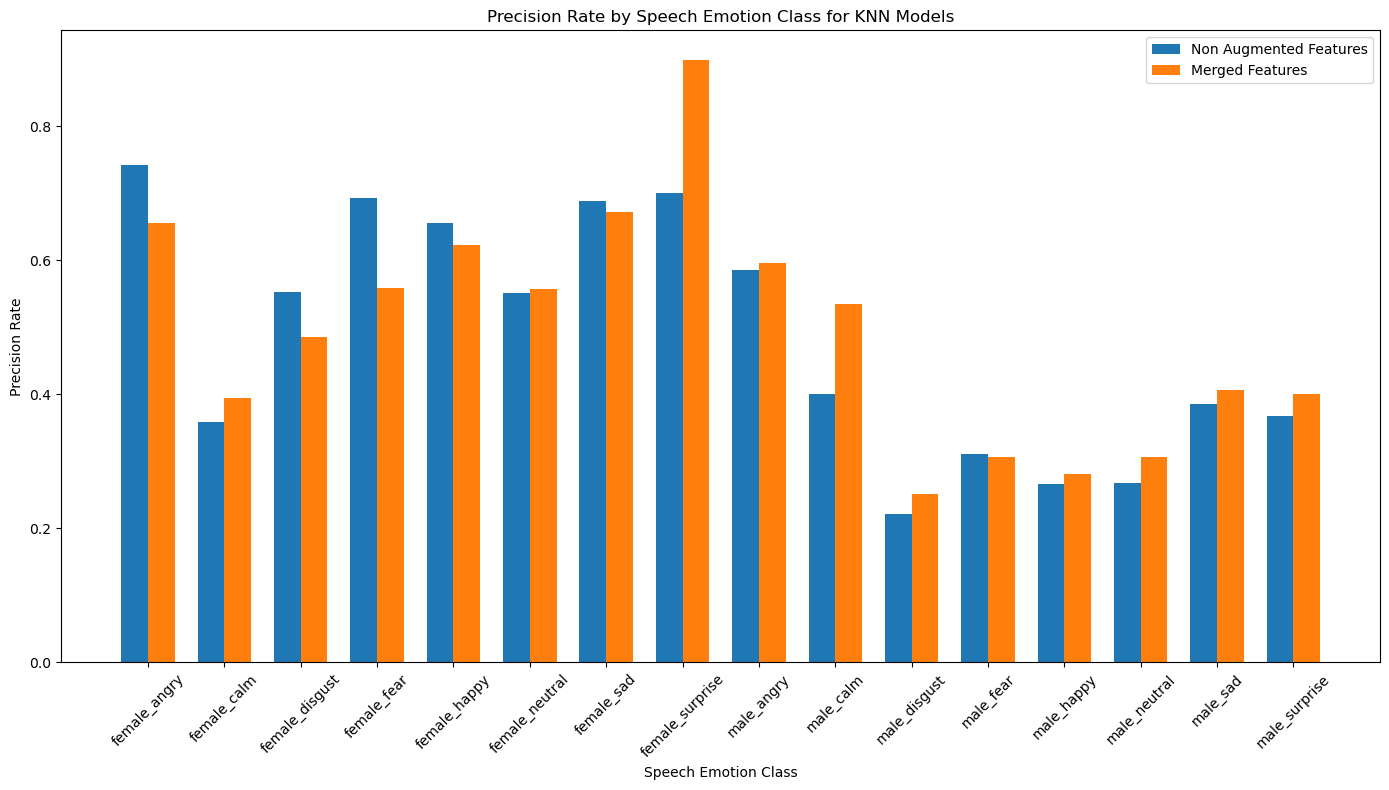

In [68]:
# Define class labels
class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Calculate precision for each class separately for clean and merged DataFrames
precision_clean_features = precision_score(y_test, y_pred_clean, average=None)
precision_merged_features = precision_score(y_test_merged, y_pred_clean_merged, average=None)


n_classes = len(class_labels)
x = np.arange(n_classes)  
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, precision_clean_features, width, label='Non Augmented Features')
bars2 = ax.bar(x + width/2, precision_merged_features, width, label='Merged Features')

# Add labels and title
ax.set_xlabel('Speech Emotion Class')
ax.set_ylabel('Precision Rate')
ax.set_title('Precision Rate by Speech Emotion Class for KNN Models')
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=45)
ax.legend()

# Show plot
fig.tight_layout()
plt.show()

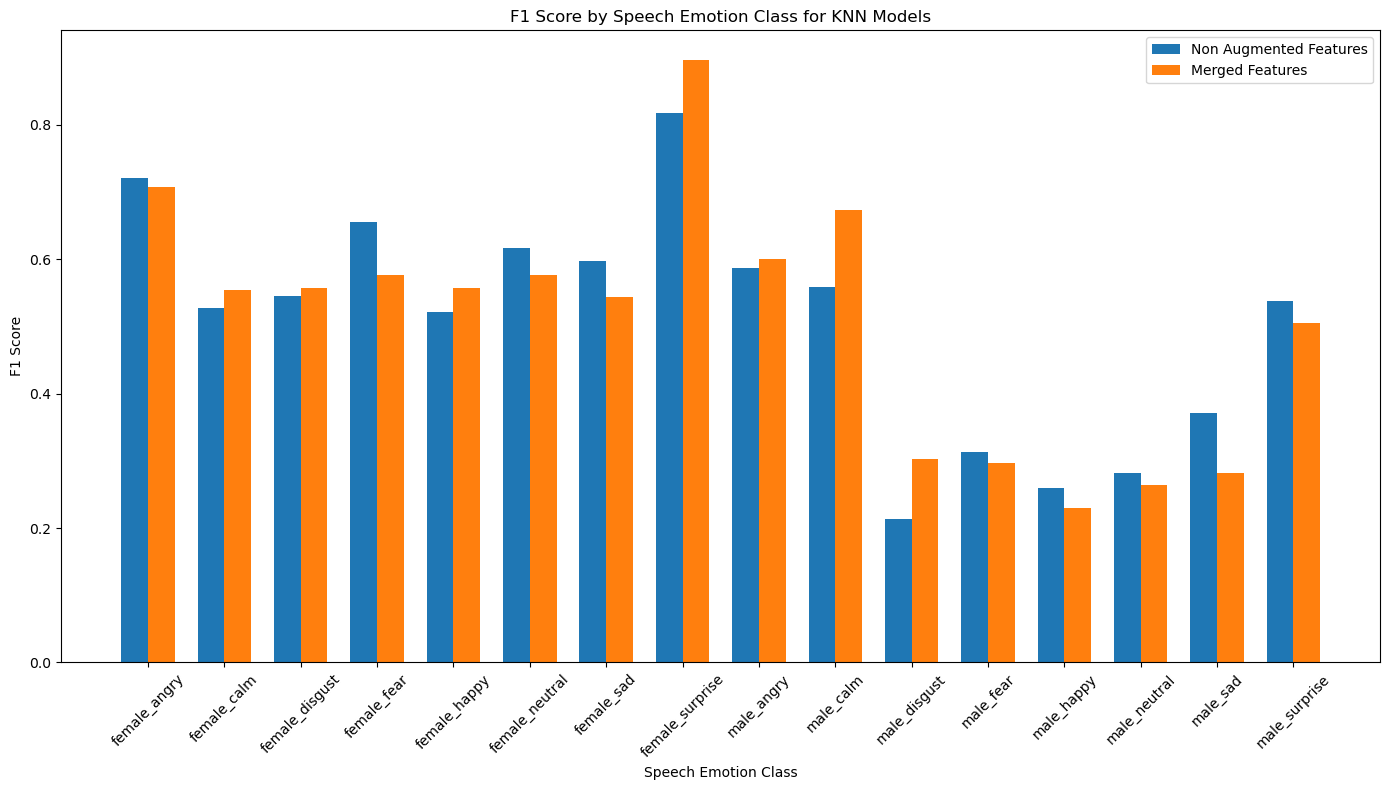

In [69]:
# Define class labels
class_labels = [
    'female_angry', 'female_calm', 'female_disgust', 'female_fear', 
    'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 
    'male_angry', 'male_calm', 'male_disgust', 'male_fear', 
    'male_happy', 'male_neutral', 'male_sad', 'male_surprise'
]

# Calculate F1 scores for each class separately for clean and merged DataFrames
f1_clean_features = f1_score(y_test, y_pred_clean, average=None)
f1_merged_features = f1_score(y_test_merged, y_pred_clean_merged, average=None)

# Number of classes
n_classes = len(class_labels)

# X-axis positions
x = np.arange(n_classes)  

# Width of bars
width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, f1_clean_features, width, label='Non Augmented Features')
bars2 = ax.bar(x + width/2, f1_merged_features, width, label='Merged Features')

# Add labels and title
ax.set_xlabel('Speech Emotion Class')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score by Speech Emotion Class for KNN Models')
ax.set_xticks(x)
ax.set_xticklabels(class_labels, rotation=45)
ax.legend()

# Show plot
fig.tight_layout()
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0b28ef1e-f6a6-4523-8903-70adcffed1c5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>